# Cubic Hermitian Spline

In [23]:
import torch

def compute_cubic_spline(parameters: torch.Tensor, step: int, horizon: int):
    """ Given a set of spline parameters, and the point in the trajectory return the function value 
    
    Args :
        parameters (Tensor): Spline action parameter      of shape(batch, num_legs, 3, spline_param)              
        step          (int): The point in the curve in [0, horizon]
        horizon       (int): The length of the curve
        
    Returns : 
        actions    (Tensor): Discrete action              of shape(batch, num_legs, 3)
    """
    # Find the point in the curve q in [0,1]
    tau = step/(horizon)        
    q = (tau - 0.0)/(1.0-0.0)
    
    # Compute the spline interpolation parameters
    a =  2*q*q*q - 3*q*q     + 1
    b =    q*q*q - 2*q*q + q
    c = -2*q*q*q + 3*q*q
    d =    q*q*q -   q*q

    # Compute intermediary parameters 
    phi_1 = 0.5*(parameters[...,2]  - parameters[...,0]) # shape (batch, num_legs, 3)
    phi_2 = 0.5*(parameters[...,3]  - parameters[...,1]) # shape (batch, num_legs, 3)

    # Compute the spline
    actions = a*parameters[...,1] + b*phi_1 + c*parameters[...,2]  + d*phi_2 # shape (batch, num_legs, 3)

    return actions

In [64]:
import torch
import matplotlib.pyplot as plt

start = 0
stop = 4
steps=100

parameters = torch.tensor((0.2, 1.0, 1.0, 0.3, 1.3, 0.9, 1.5))

x_param = torch.arange(start=start-1, end=stop+2)
print(x_param)

x = torch.linspace(start=start, end=stop, steps=steps*(stop-start))
print(x)

spline = torch.empty_like(x)

for i in range(start,stop):
    print('\nRange ',i)
    for j in range(steps):
        print('step  ', steps*i + j)
        spline[steps*i + j] = compute_cubic_spline(parameters=parameters[i:i+4], step=j, horizon=steps)


tensor([-1,  0,  1,  2,  3,  4,  5])
tensor([0.0000, 0.0100, 0.0201, 0.0301, 0.0401, 0.0501, 0.0602, 0.0702, 0.0802,
        0.0902, 0.1003, 0.1103, 0.1203, 0.1303, 0.1404, 0.1504, 0.1604, 0.1704,
        0.1805, 0.1905, 0.2005, 0.2105, 0.2206, 0.2306, 0.2406, 0.2506, 0.2607,
        0.2707, 0.2807, 0.2907, 0.3008, 0.3108, 0.3208, 0.3308, 0.3409, 0.3509,
        0.3609, 0.3709, 0.3810, 0.3910, 0.4010, 0.4110, 0.4211, 0.4311, 0.4411,
        0.4511, 0.4612, 0.4712, 0.4812, 0.4912, 0.5013, 0.5113, 0.5213, 0.5313,
        0.5414, 0.5514, 0.5614, 0.5714, 0.5815, 0.5915, 0.6015, 0.6115, 0.6216,
        0.6316, 0.6416, 0.6516, 0.6617, 0.6717, 0.6817, 0.6917, 0.7018, 0.7118,
        0.7218, 0.7318, 0.7419, 0.7519, 0.7619, 0.7719, 0.7820, 0.7920, 0.8020,
        0.8120, 0.8221, 0.8321, 0.8421, 0.8521, 0.8622, 0.8722, 0.8822, 0.8922,
        0.9023, 0.9123, 0.9223, 0.9323, 0.9424, 0.9524, 0.9624, 0.9724, 0.9825,
        0.9925, 1.0025, 1.0125, 1.0226, 1.0326, 1.0426, 1.0526, 1.0627, 1.0727,
   

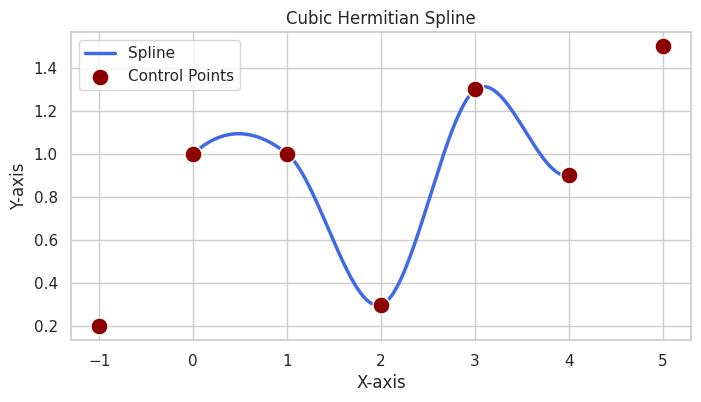

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))


# Plot the spline using Seaborn with custom color and line thickness
sns.lineplot(x=x, y=spline, ax=ax, color='royalblue', linewidth=2.5, label='Spline')

# Add a dot plot on top of the spline
sns.scatterplot(x=x_param, y=parameters, ax=ax, color='darkred', s=150, label='Control Points', zorder=5)

# Add titles and labels
ax.set_title("Cubic Hermitian Spline", fontsize=12)
ax.set_xlabel("X-axis", fontsize=12)
ax.set_ylabel("Y-axis", fontsize=12)

# Add legend
ax.legend()

# Save the plot as a PDF for high-quality output in LaTeX
plt.savefig("thesis image/cubic_hermite_spline.pdf", bbox_inches='tight')
plt.show()
